In [3]:
# Llamado de librerias
library(dplyr)
library(ggplot2)
library(patchwork)
library(forecast)
library(tseries)
library(scales)
library(gridExtra)
library(reshape)

# Tarea 1 - Simular DGP's

- Estos DGP están sujetos a los cambios de la actividad con David en donde calculabamos los interceptos, si se le remueve esto, queda tal cual lo visto con Martha.

## DGP[1]

        Mu       Phi
1 40.00193 0.3602511
2 40.10822 0.3584487
3 39.94319 0.3608174
4 39.95148 0.3613691
5 40.17469 0.3573485
6 39.97716 0.3605769


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X391,X392,X393,X394,X395,X396,X397,X398,X399,X400
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20.00000,20.00000,20.00000,20.00000,20.00000,20.00000,20.00000,20.00000,20.00000,20.00000,⋯,20.00000,20.00000,20.00000,20.00000,20.00000,20.00000,20.00000,20.00000,20.00000,20.00000
2,47.22755,47.22773,47.15612,47.11863,47.40765,47.10550,47.02048,47.32606,47.07753,47.17236,⋯,47.03348,47.39858,47.20036,47.32052,47.13050,47.22293,47.16847,47.42781,47.21147,47.29229
3,56.87657,57.24016,57.01502,57.09638,56.87843,57.08828,56.82323,56.96786,56.92668,56.77635,⋯,56.93690,57.24204,57.07489,57.09914,56.77541,56.86320,56.94760,56.92074,57.02951,57.24617
4,60.71486,60.43690,60.35259,60.64409,60.48676,60.81086,60.39452,60.42580,60.45196,60.34961,⋯,60.32214,60.30725,60.42457,60.60911,60.52931,60.61585,60.46943,60.54638,60.67111,60.50622
5,61.90678,61.74525,61.75630,62.07722,62.03195,61.89554,61.59643,61.86370,61.82815,61.77004,⋯,61.49810,61.79617,61.64652,61.99773,61.86299,61.75717,61.59497,61.75987,61.80490,61.69196
6,62.16337,62.24815,62.23679,62.45119,62.24107,62.33760,62.03262,62.25475,62.08010,62.29568,⋯,61.74661,62.30293,62.23724,62.32190,62.48589,62.37913,62.23005,62.23484,62.20865,62.00621


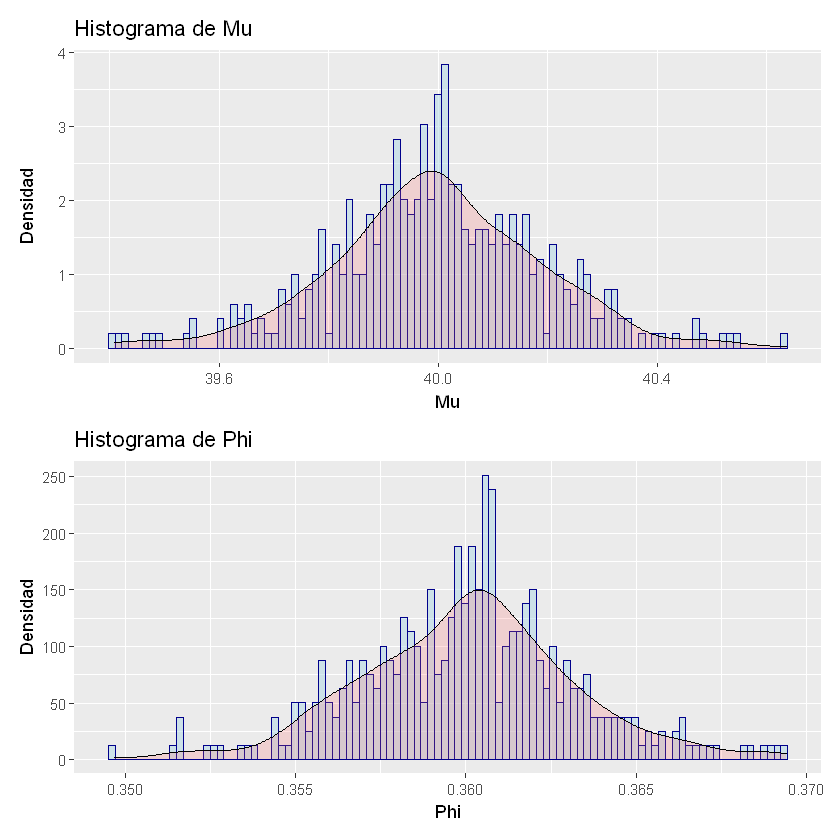

In [4]:
DGP.1 = function(Phi, Mu, Sigma_a, T, Zt_0, N_scenarios = 20, N_remove = 0){
    DGP.1 = matrix(data = NA, nrow = T, ncol = N_scenarios)
    DGP.1[1, ] = Zt_0
    for (j in 1 : N_scenarios){
        set.seed(j)
        At = rnorm(n = T, mean = 0, sd = Sigma_a)
        for (i in 2 : T){
            DGP.1[i, j] = Mu + Phi * DGP.1[i - 1, j] + At[i]
        }
        # DGP.1[, j] = DGP.1[, j] - mean(DGP.1[, j])
    }
    if (N_remove == 0){
        Zt.1 = DGP.1
    } else {
        Zt.1 = DGP.1[-(1 : N_remove), ]
    }
    Zt.1 = data.frame(Zt.1)

    # Coeficientes
    Coeff = matrix(data = NA, nrow = 2, ncol = N_scenarios)              # Nrow depende del DGP
    for (i in 1 : N_scenarios){
        Y = Zt.1[2 : T, i]
        X = cbind(1, Zt.1[1 : (T - 1), i])
        Coeff[, i] = solve(t(X) %*% X) %*% t(X) %*% Y
    }
    Coeff = data.frame(t(Coeff))
    colnames(Coeff) = c('Mu', 'Phi')

    # Gráficas
    Coeff_Mu = ggplot(Coeff, aes(x = Mu)) + 
    labs(title = 'Histograma de Mu', x = 'Mu', y = 'Densidad') +
    geom_histogram(aes(y = ..density..), colour = 'darkblue', fill = 'lightblue', alpha = 0.5, bins = N_scenarios / 4) +
    geom_density(alpha = 0.2, fill = "#FF6666")

    Coeff_Phi = ggplot(Coeff, aes(x = Phi)) + 
    labs(title = 'Histograma de Phi', x = 'Phi', y = 'Densidad') +
    geom_histogram(aes(y = ..density..), colour = 'darkblue', fill = 'lightblue', alpha = 0.5, bins = N_scenarios / 4) +
    geom_density(alpha = 0.2, fill = "#FF6666")

    # Salidas
    print(head(Coeff))
    print(Coeff_Mu / Coeff_Phi)
    return(head(Zt.1))
}

DGP.1(Phi = 0.36, Mu = 40, Sigma_a = 0.15, T = 50, Zt_0 = 20, N_scenarios = 400)

## DGP[2]

         Mu          Beta       Phi
1 0.5071024 -2.459081e-05 0.3558880
2 0.5039219 -1.988566e-05 0.3580478
3 0.5057333 -2.644422e-05 0.3575075
4 0.4984486  6.161048e-06 0.3613513
5 0.5131455 -2.479986e-05 0.3500881
6 0.4955448  2.551765e-05 0.3624248


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,40.387546,40.387727,40.316121,40.2786261,40.5676539,40.2655022,40.180484,40.4860600,40.237531,40.3323621,⋯,40.4673612,40.379897,40.282220,40.3423930,40.395607,40.435649,40.1441287,40.373238,40.443275,40.3939691
2,14.886626,15.250031,15.096501,15.2153510,14.7083777,15.2203776,15.040346,14.8793992,15.086750,14.8415887,⋯,15.1200727,15.088803,15.264116,14.7438216,15.022573,15.341239,15.4783076,14.874733,14.643854,15.0727433
3,6.223822,5.582278,5.723102,5.9332517,5.9938612,6.1081163,5.956825,5.8434809,5.910819,5.9587963,⋯,5.7813055,5.796341,5.795889,6.1986551,5.709610,5.977013,5.8679759,5.898364,6.178360,5.9450139
4,2.550710,2.667139,2.762504,2.7919162,2.9039847,2.4434707,2.560700,2.7966844,2.734982,2.7792236,⋯,2.6310623,2.490572,2.672320,2.7139395,2.730400,2.159694,2.6029659,2.694255,2.563002,2.5654585
5,1.245759,1.492071,1.469653,1.3631385,1.1982822,1.4312251,1.425361,1.3802181,1.241117,1.5148079,⋯,1.7443228,1.501685,1.194000,1.4134530,1.658779,1.255051,1.4495965,1.442870,1.596854,1.3974056
6,1.144658,1.123476,1.037369,0.6951515,0.9509928,0.7636566,1.267443,0.9875174,1.303631,0.8056503,⋯,0.8031553,1.035490,1.100956,0.9422762,1.100014,1.158515,0.8426247,1.244249,1.069021,0.8671754


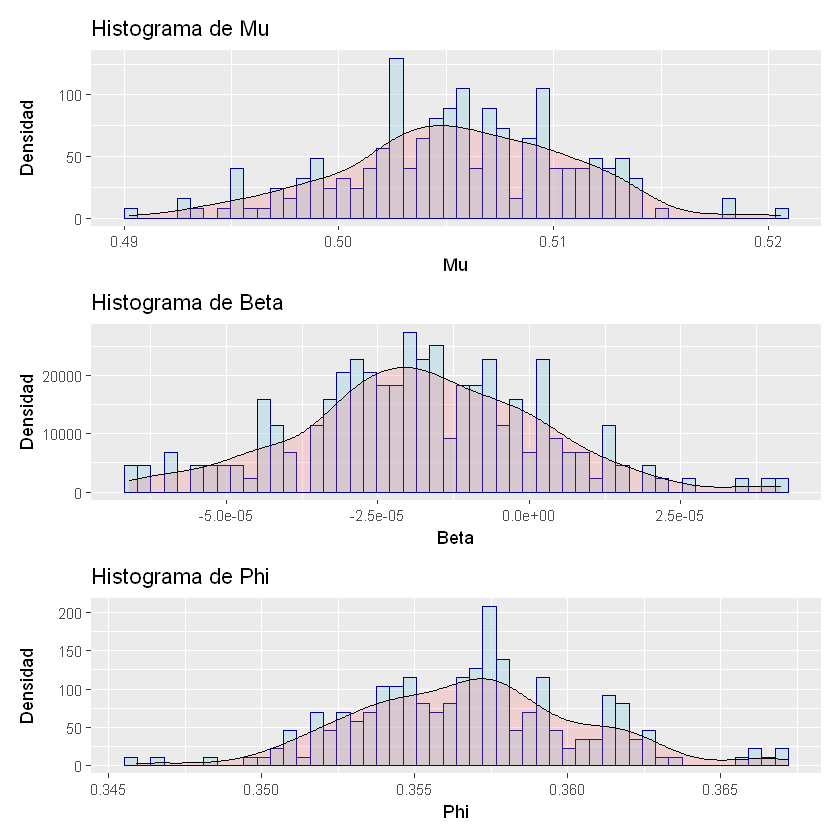

In [5]:
DGP.2 = function(Phi, Mu, Beta, Sigma_a, T, Zt_0, N_scenarios = 20, N_remove = 0, K.Dif = 3){
    DGP.2 = matrix(data = NA, nrow = T, ncol = N_scenarios)
    DGP.2[1, ] = Zt_0
    t = c(1 : (T - 1))
    for (j in 1 : N_scenarios){
        set.seed(j)
        At = rnorm(n = T, mean = 0, sd = Sigma_a)
        for (i in 2 : T){
            DGP.2[i, j] = Mu + Beta * i + Phi * DGP.2[i - 1, j] + At[i]
        }
        # DGP.2[, j] = DGP.2[, j] - mean(DGP.2[, j])
    }
    if (N_remove == 0){
        Zt.2 = DGP.2
    } else {
        Zt.2 = DGP.2[-(1 : N_remove), ]
    }
    Zt.2 = data.frame(Zt.2)

    # Estabilización en nivel
    Est.Nivel = function(Data, K.Dif){
        X = Data
        # Operador de diferencia
        Diferencia = function(Data, K.Dif){                                 # Operador de diferencia
            Serie.dif = matrix(data = NA, nrow = (T - K.Dif), ncol = 1)
            for(i in 1: (T - K.Dif)){
                Serie.dif[i] <- Data[i + K.Dif] - Data[i]
            }
            return(Serie.dif)
        }

        # Matrix con los datos de J
        S = matrix(data = NA, nrow = (K.Dif + 1), ncol = 2)
        colnames(S) = c('J', 'S(J)')
        S[, 1] = seq(0, K.Dif, 1)
        for (i in 1 : K.Dif){
            # Diferenciación de la serie
            X.dif = matrix(data = NA, ncol = 1, nrow = (T - i))
            X.dif[, 1] = Diferencia(Data = X, K.Dif = i)

            # Cálculo de los S(j) diferenciadores (rezagados)
            S[1, 2] = round(sqrt((1 / (T - 0 - 1)) * sum((X - sum(X / (T - 0))) ** 2)), 6)                            # Diferenciación de J = 0
            S[(i + 1), 2] = round(sqrt((1 / (T - i - 1)) * sum((X.dif - sum(X.dif / (T - i))) ** 2)), 6)
        }

        # J óptimo (mínimo)
        Opt = which.min(S[, 2])                     # Número en que posición esta el mínimo 
        J_opt = S[Opt, 1]                           # Número de diferencias aplicadas a la serie

        # La transformación aplicada a los datos
        X = Diferencia(Data = X, K.Dif = J_opt)
    }
    
    Nt = length(Est.Nivel(Data = Zt.2[, 1], K.Dif = K.Dif) )
    Zt.f = matrix(data = NA, nrow = Nt, ncol = N_scenarios)
    for (i in 1 : N_scenarios){
        Zt.f[, i] = Est.Nivel(Data = Zt.2[, i], K.Dif = K.Dif) 
    }
    Zt.f = data.frame(Zt.f)

    # Coeficientes
    T = Nt
    Coeff = matrix(data = NA, nrow = 3, ncol = N_scenarios)              # Nrow depende del DGP
    for (i in 1 : N_scenarios){
        Y = Zt.f[2 : T, i]
        X = cbind(1, (1 : (T - 1)), Zt.f[1 : (T - 1), i])
        Coeff[, i] = solve(t(X) %*% X) %*% t(X) %*% Y
    }
    Coeff = data.frame(t(Coeff))
    colnames(Coeff) = c('Mu', 'Beta', 'Phi')

    # Gráficas
    Coeff_Mu = ggplot(Coeff, aes(x = Mu)) + 
    labs(title = 'Histograma de Mu', x = 'Mu', y = 'Densidad') +
    geom_histogram(aes(y = ..density..), colour = 'darkblue', fill = 'lightblue', alpha = 0.5, bins = N_scenarios / 4) +
    geom_density(alpha = 0.2, fill = "#FF6666")

    Coeff_Phi = ggplot(Coeff, aes(x = Phi)) + 
    labs(title = 'Histograma de Phi', x = 'Phi', y = 'Densidad') +
    geom_histogram(aes(y = ..density..), colour = 'darkblue', fill = 'lightblue', alpha = 0.5, bins = N_scenarios / 4) +
    geom_density(alpha = 0.2, fill = "#FF6666")

    Coeff_Beta = ggplot(Coeff, aes(x = Beta)) + 
    labs(title = 'Histograma de Beta', x = 'Beta', y = 'Densidad') +
    geom_histogram(aes(y = ..density..), colour = 'darkblue', fill = 'lightblue', alpha = 0.5, bins = N_scenarios / 4) +
    geom_density(alpha = 0.2, fill = "#FF6666")

    # Salidas
    print(head(Coeff))
    print(Coeff_Mu / Coeff_Beta / Coeff_Phi)
    return(head(Zt.f))
}

DGP.2(Phi = 0.36, Mu = 40, Beta = 0.5, Sigma_a = 0.15, T = 240, Zt_0 = 1, N_scenarios = 200)

## DGP[3]

        Zt1
1 1.0001439
2 1.0001450
3 1.0000607
4 1.0000360
5 1.0002324
6 0.9995952


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X391,X392,X393,X394,X395,X396,X397,X398,X399,X400
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20.00000,2.995732,20.00000,20.00000,20.00000,0.05000000,20.00000,4.472136,20.00000,20.00000,⋯,2.995732,0.2236068,20.00000,0.2236068,20.00000,0.05000000,20.00000,20.00000,20.00000,0.05000000
2,20.02755,2.997118,19.95612,19.91863,20.20765,0.05023737,19.82048,4.486208,19.87753,19.97236,⋯,2.987372,0.2225049,20.00036,0.2229361,19.93050,0.04994274,19.96847,20.22781,20.01147,0.04977033
3,19.90220,3.008940,19.99494,20.05230,20.01933,0.04991066,19.71634,4.478453,19.85630,19.76666,⋯,2.987616,0.2215279,20.08312,0.2225838,19.73893,0.05028696,19.93542,20.07454,20.04485,0.04922899
4,20.14149,3.000538,19.82212,20.14169,20.02985,0.04927351,19.65450,4.469218,19.81466,19.67679,⋯,2.978748,0.2231762,19.96073,0.2222898,19.82909,0.04992270,19.90371,20.12946,20.18534,0.04947842
5,20.19092,2.999939,19.85149,20.38704,20.28657,0.04926470,19.50890,4.481553,19.88011,19.72097,⋯,2.967606,0.2227022,19.85440,0.2213162,19.90153,0.05008406,19.72969,20.09263,20.14864,0.04970042
6,20.06785,3.000927,19.85601,20.49043,20.19613,0.04913109,19.36680,4.479747,19.70208,19.77944,⋯,2.947204,0.2223919,19.89890,0.2213015,20.11674,0.04971914,19.78555,20.09392,20.10752,0.05020670


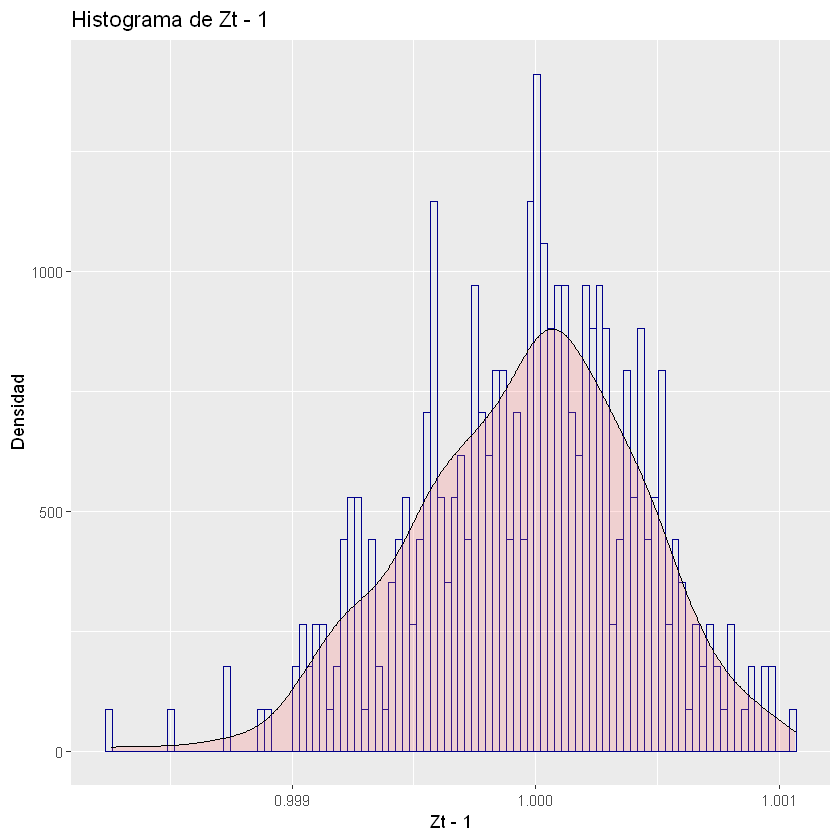

In [6]:
DGP.3 = function(Sigma_a, T, Zt_0, N_scenarios = 20, N_remove = 0){
    DGP.3 = matrix(data = NA, nrow = T, ncol = N_scenarios)
    DGP.3[1, ] = Zt_0
    for (j in 1 : N_scenarios){
        set.seed(j)
        At = rnorm(n = T, mean = 0, sd = Sigma_a)
        for (i in 2 : T){
            DGP.3[i, j] = DGP.3[i - 1, j] + At[i]
        }
        # DGP.3[, j] = DGP.3[, j] - mean(DGP.3[, j])
    }
    if (N_remove == 0){
        Zt.3 = DGP.3
    } else {
        Zt.3 = DGP.3[-(1 : N_remove), ]
    }
    Zt.3 = data.frame(Zt.3)

    # Estabilización en varianza
    Est.Var = function(Data, R = 12, Lambdas = c(-1, -0.5, 0, 0.5, 1)){
        X = Data
        T = length(X)

        # Función para verificar si un número es entero o no
        is.wholenumber <- function(x, tol = .Machine$double.eps ** 0.5)abs(x - round(x)) < tol             # TRUE = Entero, FALSE = Decimal

        # Redefinición de los datos
        X.r = matrix(data = X, nrow = 12)
        if (is.wholenumber(T / R) == 'FALSE'){
            H = floor(T / R)
            if (T > (H * R)){                                     # Llenar de NA los datos que se repiten al no ser múltiplo de R la matriz
                l = T - (H * R)
                X.r[((l + 1) : R), (H + 1)] = NA
            }
        } else if (is.wholenumber(T / R) == 'TRUE'){
            H = T / R
            X.r = matrix(data = X, nrow = R)
        }

        # Cálculo de las medias y desviaciones
        Zb = matrix(data = NA, ncol = H, nrow = 1)
        Zvar = matrix(data = NA, ncol = H, nrow = 1)
        for (i in 1 : H){
        Zb[i] = sum(X.r[, i]) / R
        Zvar[i] = sqrt((sum((X.r[, i] - Zb[i]) ** 2)) / (R - 1))
        }

        # Crear vector de lambdas
        Nlambdas = length(Lambdas)

        # Datos transformados
        Data.t = matrix(data = NA, ncol = Nlambdas, nrow = H)
        for (i in 1 : Nlambdas){
            for (j in 1 : H){
                Data.t[j, i] = Zvar[j] / (Zb[j] ** (1 - Lambdas[i])) 
            }
        }

        # Matriz con los datos de los lambas
        MLambda = matrix(data = NA, nrow = Nlambdas, ncol = 4)
        colnames(MLambda) = c("Lambda", "M (Lambda)","SD (Lambda)","CV (Lambda)")
        MLambda[, 1] = Lambdas

        for (i in 1 : Nlambdas){
        MLambda[i, 2] = mean(Data.t[, i])
        MLambda[i, 3] = sqrt((sum((Data.t[, i] - MLambda[i, 2]) ** 2)) / (H - 1))
        MLambda[i, 4] = MLambda[i, 3] / MLambda[i, 2]
        }

        # Lambda óptimo (mínimo)
        Opt = which.min(MLambda[, 4])                     # Número en que posición esta el mínimo 
        Lambda_opt = Lambdas[Opt]                         # Lambda óptimo

        # La transformación aplicada a los datos
        if (Lambda_opt == 0){
            X = log(X)
        } else {
            X = X ** Lambda_opt
        }
        # print(Lambda_opt)
    }

    Nt = length(Est.Var(Data = Zt.3[, 1]))
    Zt.f = matrix(data = NA, nrow = Nt, ncol = N_scenarios)
    for (i in 1 : N_scenarios){
        Zt.f[, i] = Est.Var(Data = Zt.3[, i]) 
    }
    Zt.f = data.frame(Zt.f)

    # Coeficientes  
    T = Nt
    Coeff = matrix(data = NA, nrow = 1, ncol = N_scenarios)              # Nrow depende del DGP
    for (i in 1 : N_scenarios){
        Y = Zt.3[2 : T, i]
        X = cbind(Zt.3[1 : (T - 1), i])
        Coeff[, i] = solve(t(X) %*% X) %*% t(X) %*% Y
    }
    Coeff = data.frame(t(Coeff))
    colnames(Coeff) = c('Zt1')

    # Gráficas
    Coeff_Zt1 = ggplot(Coeff, aes(x = Zt1)) + 
    labs(title = 'Histograma de Zt - 1', x = 'Zt - 1', y = 'Densidad') +
    geom_histogram(aes(y = ..density..), colour = 'darkblue', fill = 'lightblue', alpha = 0.05, bins = N_scenarios / 4) +
    geom_density(alpha = 0.2, fill = "#FF6666")

    # Salidas
    print(head(Coeff))
    print(Coeff_Zt1)
    return(head(Zt.f))
}

DGP.3(Sigma_a = 0.15, T = 240, Zt_0 = 20, N_scenarios = 400)

## DGP[4]

        Mu       Zt1
1 20.02328 0.9999917
2 20.00949 0.9999977
3 19.99969 1.0000010
4 20.02720 0.9999890
5 20.00649 0.9999992
6 19.99851 0.9999972


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X391,X392,X393,X394,X395,X396,X397,X398,X399,X400
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20.02755,20.02773,19.95612,19.91863,20.20765,19.90550,19.82048,20.12606,19.87753,19.97236,⋯,19.83348,20.19858,20.00036,20.12052,19.93050,20.02293,19.96847,20.22781,20.01147,20.09229
2,19.87466,20.23818,20.03882,20.13367,19.81168,20.13030,19.89586,19.93048,19.97877,19.79430,⋯,20.00485,20.17855,20.08276,20.06375,19.80843,19.86294,19.96695,19.84673,20.03338,20.22094
3,20.23929,19.83044,19.82718,20.08940,20.01052,20.25908,19.93816,19.91737,19.95836,19.91012,⋯,19.82485,19.70012,19.87761,20.05342,20.09017,20.14510,19.96829,20.05492,20.14049,19.89760
4,20.04943,19.98796,20.02937,20.24534,20.25672,20.00363,19.85440,20.11041,20.06545,20.04418,⋯,19.78213,20.08556,19.89368,20.17845,20.07244,19.93546,19.82598,19.96317,19.96330,19.90972
5,19.87693,20.01986,20.00452,20.10339,19.90956,20.05520,19.85791,19.98382,19.82197,20.05847,⋯,19.60729,20.05631,20.04449,20.00272,20.21521,20.14655,20.05586,20.00129,19.95889,19.79711
6,20.07311,20.10619,20.01281,19.80781,19.92918,19.80362,20.11222,19.97446,20.17880,19.81879,⋯,20.03983,20.14277,19.87890,20.09309,20.08203,19.94364,19.90647,20.13747,20.02512,20.12911


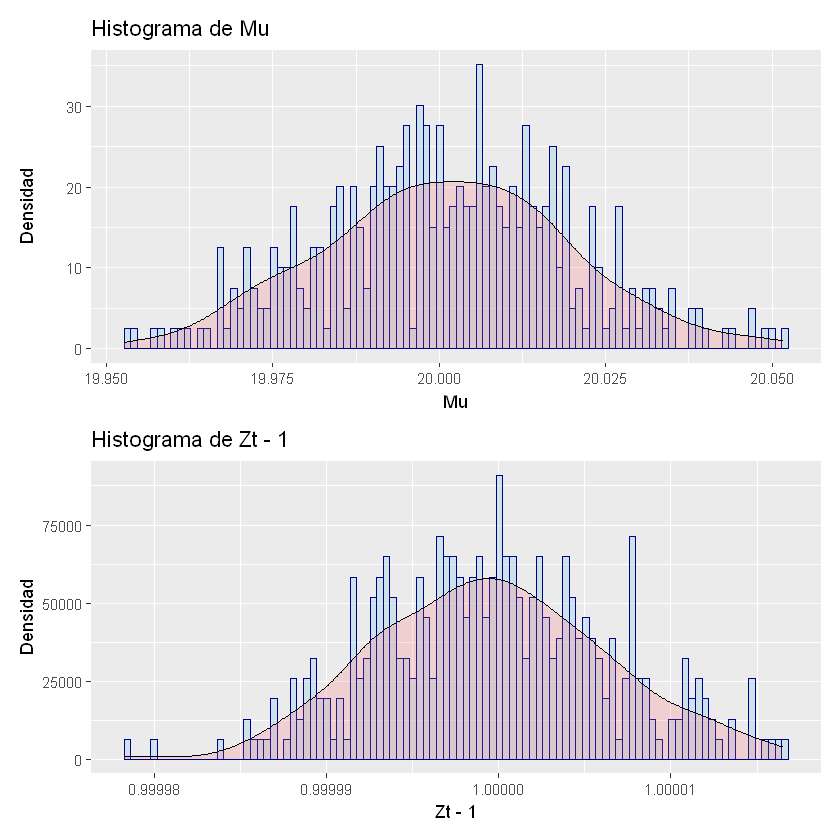

In [7]:
DGP.4 = function(Mu, Sigma_a, T, Zt_0, N_scenarios = 20, N_remove = 0, K.Dif = 3){
    DGP.4 = matrix(data = NA, nrow = T, ncol = N_scenarios)
    DGP.4[1, ] = Zt_0
    for (j in 1 : N_scenarios){
        set.seed(j)
        At = rnorm(n = T, mean = 0, sd = Sigma_a)
        for (i in 2 : T){
            DGP.4[i, j] = Mu + DGP.4[i - 1, j] + At[i]
        }
        # DGP.4[, j] = DGP.4[, j] - mean(DGP.4[, j])
    }
    if (N_remove == 0){
        Zt.4 = DGP.4
    } else {
        Zt.4 = DGP.4[-(1 : N_remove), ]
    }
    Zt.4 = data.frame(Zt.4)

    # Estabilización en varianza
    Est.Var = function(Data, R = 12, Lambdas = c(-1, -0.5, 0, 0.5, 1)){
        X = Data
        T = length(X)

        # Función para verificar si un número es entero o no
        is.wholenumber <- function(x, tol = .Machine$double.eps ** 0.5)abs(x - round(x)) < tol             # TRUE = Entero, FALSE = Decimal

        # Redefinición de los datos
        X.r = matrix(data = X, nrow = 12)
        if (is.wholenumber(T / R) == 'FALSE'){
            H = floor(T / R)
            if (T > (H * R)){                                     # Llenar de NA los datos que se repiten al no ser múltiplo de R la matriz
                l = T - (H * R)
                X.r[((l + 1) : R), (H + 1)] = NA
            }
        } else if (is.wholenumber(T / R) == 'TRUE'){
            H = T / R
            X.r = matrix(data = X, nrow = R)
        }

        # Cálculo de las medias y desviaciones
        Zb = matrix(data = NA, ncol = H, nrow = 1)
        Zvar = matrix(data = NA, ncol = H, nrow = 1)
        for (i in 1 : H){
        Zb[i] = sum(X.r[, i]) / R
        Zvar[i] = sqrt((sum((X.r[, i] - Zb[i]) ** 2)) / (R - 1))
        }

        # Crear vector de lambdas
        Nlambdas = length(Lambdas)

        # Datos transformados
        Data.t = matrix(data = NA, ncol = Nlambdas, nrow = H)
        for (i in 1 : Nlambdas){
            for (j in 1 : H){
                Data.t[j, i] = Zvar[j] / (Zb[j] ** (1 - Lambdas[i])) 
            }
        }

        # Matriz con los datos de los lambas
        MLambda = matrix(data = NA, nrow = Nlambdas, ncol = 4)
        colnames(MLambda) = c("Lambda", "M (Lambda)","SD (Lambda)","CV (Lambda)")
        MLambda[, 1] = Lambdas

        for (i in 1 : Nlambdas){
        MLambda[i, 2] = mean(Data.t[, i])
        MLambda[i, 3] = sqrt((sum((Data.t[, i] - MLambda[i, 2]) ** 2)) / (H - 1))
        MLambda[i, 4] = MLambda[i, 3] / MLambda[i, 2]
        }

        # Lambda óptimo (mínimo)
        Opt = which.min(MLambda[, 4])                     # Número en que posición esta el mínimo 
        Lambda_opt = Lambdas[Opt]                         # Lambda óptimo

        # La transformación aplicada a los datos
        if (Lambda_opt == 0){
            X = log(X)
        } else {
            X = X ** Lambda_opt
        }
        # print(Lambda_opt)
    }

    Nt = length(Est.Var(Data = Zt.4[, 1]))
    Zt.v = matrix(data = NA, nrow = Nt, ncol = N_scenarios)
    for (i in 1 : N_scenarios){
        Zt.v[, i] = Est.Var(Data = Zt.4[, i]) 
    }
    Zt.v = data.frame(Zt.v)

    # Estabilización en nivel
    Est.Nivel = function(Data, K.Dif){
        X = Data
        T = length(X)
        # Operador de diferencia
        Diferencia = function(Data, K.Dif){                                 # Operador de diferencia
            Serie.dif = matrix(data = NA, nrow = (T - K.Dif), ncol = 1)
            for(i in 1: (T - K.Dif)){
                Serie.dif[i] <- Data[i + K.Dif] - Data[i]
            }
            return(Serie.dif)
        }

        # Matrix con los datos de J
        S = matrix(data = NA, nrow = (K.Dif + 1), ncol = 2)
        colnames(S) = c('J', 'S(J)')
        S[, 1] = seq(0, K.Dif, 1)
        for (i in 1 : K.Dif){
            # Diferenciación de la serie
            X.dif = matrix(data = NA, ncol = 1, nrow = (T - i))
            X.dif[, 1] = Diferencia(Data = X, K.Dif = i)

            # Cálculo de los S(j) diferenciadores (rezagados)
            S[1, 2] = round(sqrt((1 / (T - 0 - 1)) * sum((X - sum(X / (T - 0))) ** 2)), 6)                            # Diferenciación de J = 0
            S[(i + 1), 2] = round(sqrt((1 / (T - i - 1)) * sum((X.dif - sum(X.dif / (T - i))) ** 2)), 6)
        }

        # J óptimo (mínimo)
        Opt = which.min(S[, 2])                     # Número en que posición esta el mínimo 
        J_opt = S[Opt, 1]                           # Número de diferencias aplicadas a la serie

        # La transformación aplicada a los datos
        X = Diferencia(Data = X, K.Dif = J_opt)
    }
    
    Nt = length(Est.Nivel(Data = Zt.v[, 1], K.Dif = K.Dif))
    Zt.f = matrix(data = NA, nrow = Nt, ncol = N_scenarios)
    for (i in 1 : N_scenarios){
        Zt.f[, i] = Est.Nivel(Data = Zt.v[, i], K.Dif = K.Dif) 
    }
    Zt.f = data.frame(Zt.f)

    # Coeficientes
    T = Nt
    Coeff = matrix(data = NA, nrow = 2, ncol = N_scenarios)              # Nrow depende del DGP
    for (i in 1 : N_scenarios){
        Y = Zt.4[2 : T, i]
        X = cbind(1, Zt.4[1 : (T - 1), i])
        Coeff[, i] = solve(t(X) %*% X) %*% t(X) %*% Y
    }
    Coeff = data.frame(t(Coeff))
    colnames(Coeff) = c('Mu', 'Zt1')

    # Gráficas
    Coeff_Mu = ggplot(Coeff, aes(x = Mu)) + 
    labs(title = 'Histograma de Mu', x = 'Mu', y = 'Densidad') +
    geom_histogram(aes(y = ..density..), colour = 'darkblue', fill = 'lightblue', alpha = 0.5, bins = N_scenarios / 4) +
    geom_density(alpha = 0.2, fill = "#FF6666")

    Coeff_Zt1 = ggplot(Coeff, aes(x = Zt1)) + 
    labs(title = 'Histograma de Zt - 1', x = 'Zt - 1', y = 'Densidad') +
    geom_histogram(aes(y = ..density..), colour = 'darkblue', fill = 'lightblue', alpha = 0.5, bins = N_scenarios / 4) +
    geom_density(alpha = 0.2, fill = "#FF6666")

    # Salidas
    print(head(Coeff))
    print(Coeff_Mu / Coeff_Zt1)
    return(head(Zt.f))
}

DGP.4(Mu = 20, Sigma_a = 0.15, Zt_0 = 1, N_scenarios = 400, T = 240)

# Tarea 2 - Impulso respuesta

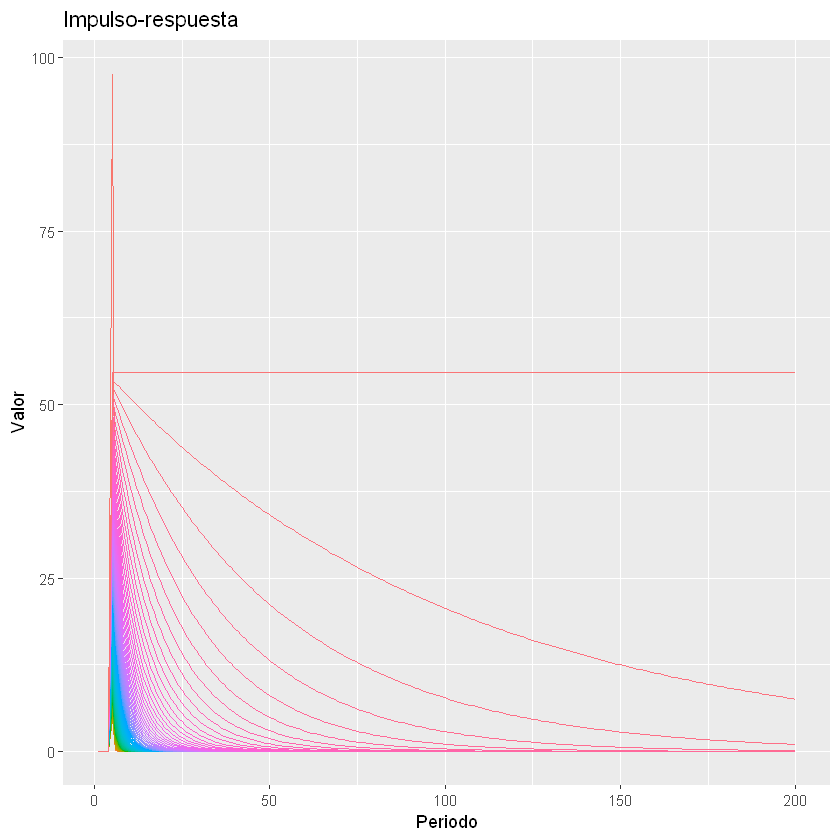

In [8]:
Escenarios<-100
N<-200
M<-2
de<-1
X0<-50
obs.eliminadas<-5
corte = 2
bin<-0.005

Dif<-matrix(data=NA,ncol=Escenarios,nrow=N)

for (k in 1:Escenarios) {
  
    phi<-(k/Escenarios)
    
    set.seed(1)
    a<-rnorm(N,mean=0,sd=de)
    Z.og<-matrix(data=NA,ncol=1,nrow=N)
    Z.og[1]<-X0
    for (i in 2:N) {
    Z.og[i]<-M+(phi*Z.og[i-1])+a[i]
    }

    #Serie de impulso

    X.choque<-Z.og[corte-1]*2
    corte = obs.eliminadas
    Z<-matrix(data=NA,ncol=1,nrow=N)
    Z[1]<-X0
    for (i in 2:(corte-1)) {
    Z[i]<-M+(phi*Z[i-1])+a[i]
    }
    corte<-obs.eliminadas
    Z[obs.eliminadas]<-X.choque
    for (i in (corte+1):N) {
    Z[i]<-M+(phi*Z[i-1])+a[i]
    }
    #ZZ[1:length(Z),k]<-Z
    #ZZ.og[1:length(Z),k]<-Z.og
    Dif[1:length(Z),k]<-as.matrix((Z-Z.og))
}

DF<-as.data.frame(Dif)
DF.1 <- data.frame(x = seq_along(DF[, 1]), DF)
DF.2 <- melt(DF.1, id.vars = "x")
ggplot(DF.2, aes(x = x, y = value, color = variable)) + 
  geom_line(linetype = 1,lwd = 0.1, show.legend = FALSE) +
  xlab("Periodo") + ylab("Valor") + ggtitle("Impulso-respuesta")

# Tarea 3 - Simular Tao's

## Tao

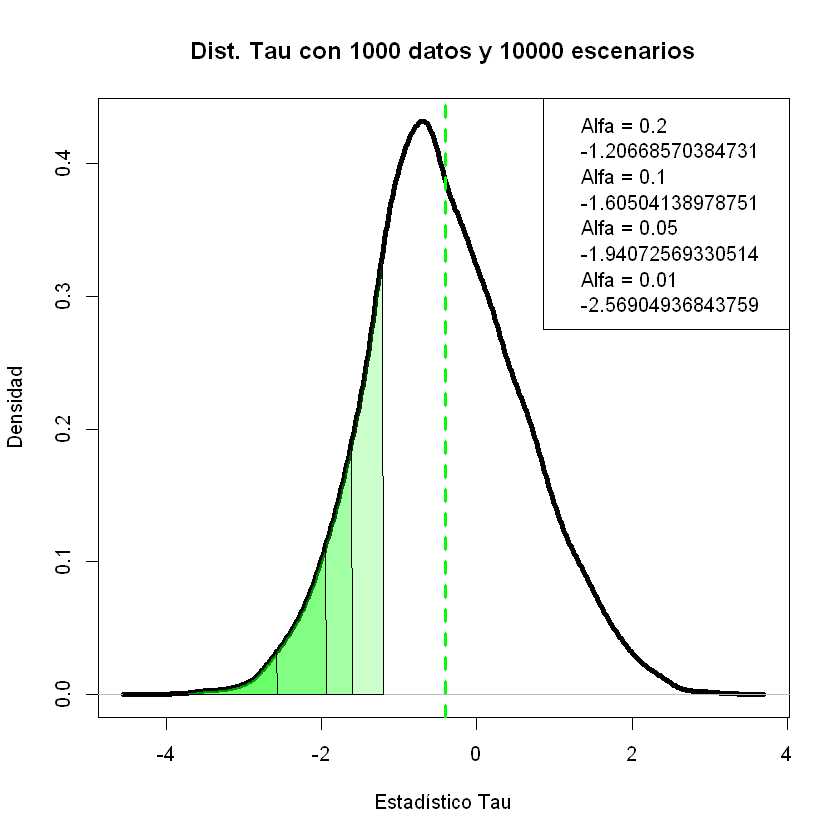

In [9]:
#Creando la función
Tau <- function(T, S, Z_0 = 0, Sigma_a = 1){
  Zt <- c(Z_0)                                                    #Creando matriz con el valor inicial
  
  #Creando una matriz vacía para almacenar los estadísticos
  Tau = c()
  
  for (n in 1 : S){
    #Generando los errores
    set.seed(n)
    At <- rnorm(n = T ,mean = 0, sd = Sigma_a)

    #Corriendo la función generadora del PGD
    for(t in 2 : T){
      Zt[t] = Zt[t - 1] + At[t]
    }

    #Calculando la serie diferenciada
    Diferencia = function(Data){                                 # Operador de diferencia
        Serie.dif = matrix(data = NA, nrow = (T - 1), ncol = 1)
        for(i in 1 : (T - 1)){
            Serie.dif[i] <- Data[i + 1] - Data[i]
        }
        return(Serie.dif)
    }
    X.Diff = Diferencia(Data = Zt)

    #Calculando la serie rezagada
    X.Rez <- Zt[1 : (T - 1)]
    
    #Estimando la regresión (OLS)
    Y = X.Diff
    X = cbind(X.Rez)
    Coeff = solve(t(X) %*% X) %*% (t(X) %*% Y)
    Gamma = Coeff[1]                                               # Coeficiente Gamma estimado

    # Estimación sigma^2 (Beta moño de OLS)
    Ym = X %*% Coeff
    Em = Y - Ym
    Sigma2 = as.numeric((t(Em) %*% Em) / (T - 1))
    Var.cov = (Sigma2 * solve(t(X) %*% X))
    Gamma_std = sqrt(Var.cov[1, 1])
    
    #Llenando la matriz
    Tau[n] <- Gamma / Gamma_std
  }
  # Quantiles
  Q = matrix(data = c(quantile(Tau, probs = 0.2), quantile(Tau, probs = 0.1), quantile(Tau, probs = 0.05), quantile(Tau, probs = 0.01)), ncol = 4, nrow = 1)
  colnames(Q) = c('20%', '10%', '5%', '1%')

  # Gráficas
  # print(G_Tau)
  Den = density(Tau)
  value1 = Q[, 1]
  value2 = Q[, 2]
  value3 = Q[, 3]
  value4 = Q[, 4]
  plot(Den, main = sprintf('Dist. Tau con %s datos y %s escenarios', T, S), xlab = "Estadístico Tau", ylab = "Densidad", col = "black", lty = 1, lwd = 4)
  legend(x= "topright" , legend = c("Alfa = 0.2", Q[, 1], "Alfa = 0.1", Q[, 2], "Alfa = 0.05", Q[, 3], "Alfa = 0.01", Q[, 4]))
  polygon(c(Den$x[Den$x <= value1], value1),
        c(Den$y[Den$x <= value1], 0),
        col = rgb(0, 1, 0, alpha = 0.2),
        border = 1)
  polygon(c(Den$x[Den$x <= value2], value2),
      c(Den$y[Den$x <= value2], 0),
      col = rgb(0, 1, 0, alpha = 0.2),
      border = 1)
  polygon(c(Den$x[Den$x <= value3], value3),
    c(Den$y[Den$x <= value3], 0),
    col = rgb(0, 1, 0, alpha = 0.2),
    border = 1)
  polygon(c(Den$x[Den$x <= value4], value4),
      c(Den$y[Den$x <= value4], 0),
      col = rgb(0, 1, 0, alpha = 0.2),
      border = 1)
  abline(v = mean(Tau), col = "green", lwd = 3, lty = 2)
}
Tau(T = 1000, S = 10000)

## Tao ~ Mu

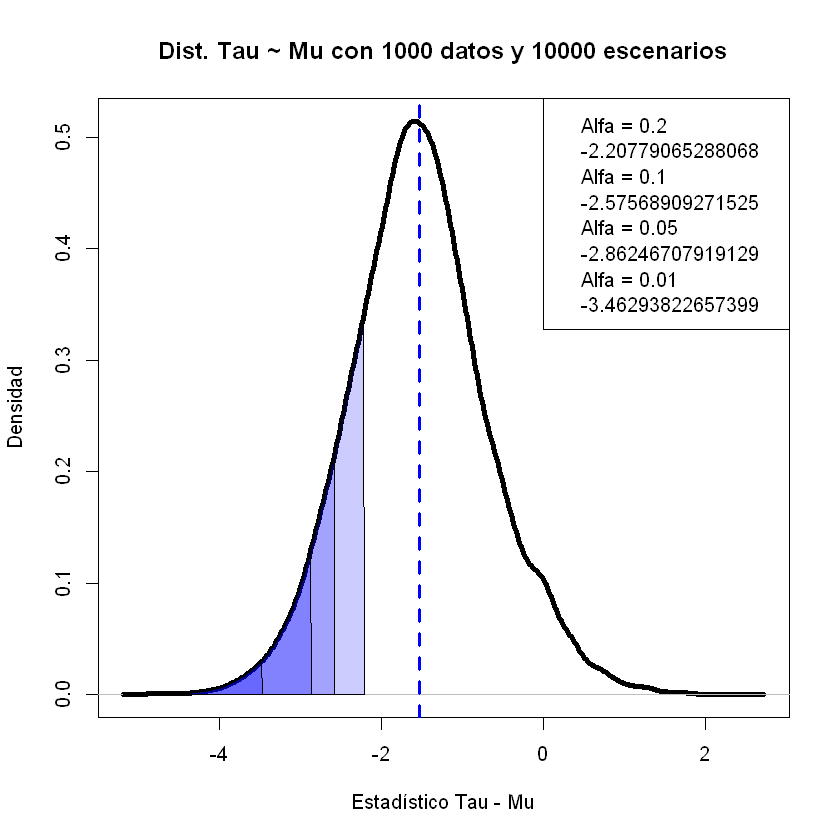

In [11]:
#Creando la función
Tau_M <- function(T, S, Z_0 = 0, Sigma_a = 1){
  Zt <- c(Z_0)                                                    #Creando matriz con el valor inicial
  
  #Creando una matriz vacía para almacenar los estadísticos
  Tau_M = c()
  
  for (n in 1 : S){
    #Generando los errores
    set.seed(n)
    At <- rnorm(n = T ,mean = 0, sd = Sigma_a)

    #Corriendo la función generadora del PGD
    for(t in 2 : T){
      Zt[t] = Zt[t - 1] + At[t]
    }

    #Calculando la serie diferenciada
    Diferencia = function(Data){                                 # Operador de diferencia
        Serie.dif = matrix(data = NA, nrow = (T - 1), ncol = 1)
        for(i in 1 : (T - 1)){
            Serie.dif[i] <- Data[i + 1] - Data[i]
        }
        return(Serie.dif)
    }
    X.Diff = Diferencia(Data = Zt)

    #Calculando la serie rezagada
    X.Rez <- Zt[1 : (T - 1)]
    
    #Estimando la regresión (OLS)
    Y = X.Diff
    X = cbind(1, X.Rez)
    Coeff = solve(t(X) %*% X) %*% (t(X) %*% Y)
    Gamma = Coeff[2]                                               # Coeficiente Gamma estimado

    # Estimación sigma^2 (Beta moño de OLS)
    Ym = X %*% Coeff
    Em = Y - Ym
    Sigma2 = as.numeric((t(Em) %*% Em) / (T - 2))
    Var.cov = (Sigma2 * solve(t(X) %*% X))
    Gamma_std = sqrt(Var.cov[2, 2])
    
    #Llenando la matriz
    Tau_M[n] <- Gamma / Gamma_std
  }
  # Quantiles
  Q = matrix(data = c(quantile(Tau_M, probs = 0.2), quantile(Tau_M, probs = 0.1), quantile(Tau_M, probs = 0.05), quantile(Tau_M, probs = 0.01)), ncol = 4, nrow = 1)
  colnames(Q) = c('20%', '10%', '5%', '1%')

  # Gráficas
  # print(G_Tau_M)
  Den = density(Tau_M)
  value1 = Q[, 1]
  value2 = Q[, 2]
  value3 = Q[, 3]
  value4 = Q[, 4]
  plot(Den, main = sprintf('Dist. Tau ~ Mu con %s datos y %s escenarios', T, S), xlab="Estadístico Tau - Mu", ylab="Densidad", col="black", lty=1, lwd=4)
  legend(x= "topright" , legend = c("Alfa = 0.2", Q[, 1], "Alfa = 0.1", Q[, 2], "Alfa = 0.05", Q[, 3], "Alfa = 0.01", Q[, 4]))
  polygon(c(Den$x[Den$x <= value1], value1),
        c(Den$y[Den$x <= value1], 0),
        col = rgb(0, 0, 1, alpha = 0.2),
        border = 1)
  polygon(c(Den$x[Den$x <= value2], value2),
      c(Den$y[Den$x <= value2], 0),
      col = rgb(0, 0, 1, alpha = 0.2),
      border = 1)
  polygon(c(Den$x[Den$x <= value3], value3),
    c(Den$y[Den$x <= value3], 0),
    col = rgb(0, 0, 1, alpha = 0.2),
    border = 1)
  polygon(c(Den$x[Den$x <= value4], value4),
      c(Den$y[Den$x <= value4], 0),
      col = rgb(0, 0, 1, alpha = 0.2),
      border = 1)
  abline(v = mean(Tau_M), col = "blue", lwd = 3, lty = 2)
}
Tau_M(T = 1000, S = 10000)

## Tao ~ Tao

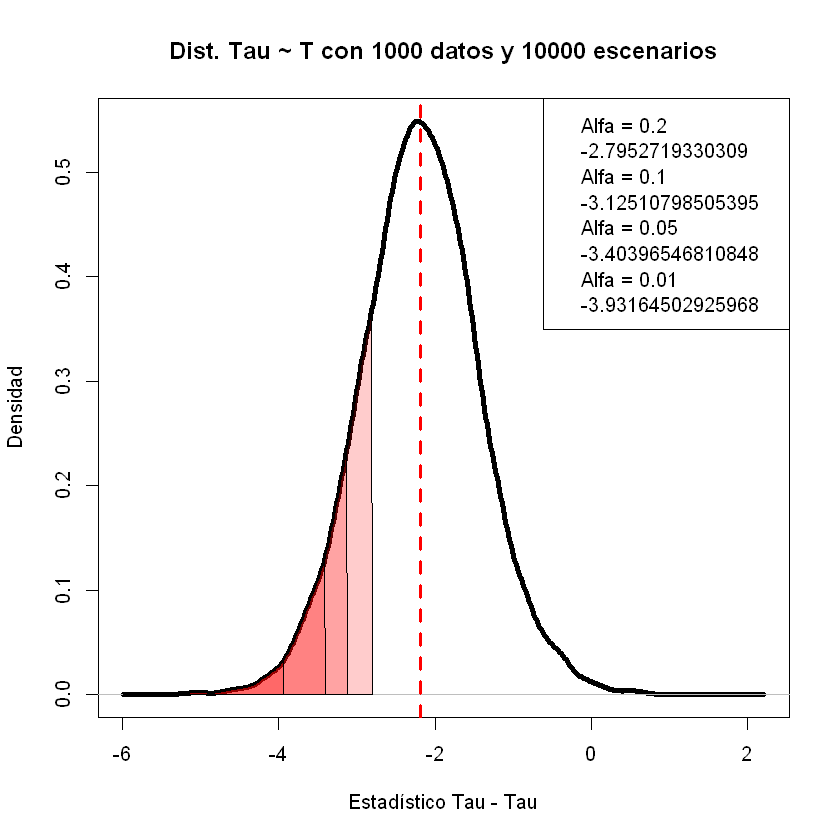

In [13]:
#Creando la función
Tau_T <- function(T, S, Z_0 = 0, Sigma_a = 1){
  Zt <- c(Z_0)                                                    #Creando matriz con el valor inicial
  
  #Creando una matriz vacía para almacenar los estadísticos
  Tau_T = c()
  
  for (n in 1 : S){
    #Generando los errores
    set.seed(n)
    At <- rnorm(n = T ,mean = 0, sd = Sigma_a)

    #Corriendo la función generadora del PGD
    for(t in 2 : T){
      Zt[t] = Zt[t - 1] + At[t]
    }

    #Calculando la serie diferenciada
    Diferencia = function(Data){                                 # Operador de diferencia
        Serie.dif = matrix(data = NA, nrow = (T - 1), ncol = 1)
        for(i in 1 : (T - 1)){
            Serie.dif[i] <- Data[i + 1] - Data[i]
        }
        return(Serie.dif)
    }
    X.Diff = Diferencia(Data = Zt)

    #Calculando la serie rezagada
    X.Rez <- Zt[1 : (T - 1)]
    
    #Estimando la regresión (OLS)
    Y = X.Diff
    X = cbind(1, c(1 : (T - 1)), X.Rez)
    Coeff = solve(t(X) %*% X) %*% (t(X) %*% Y)
    Gamma = Coeff[3]                                               # Coeficiente Gamma estimado

    # Estimación sigma^2 (Beta moño de OLS)
    Ym = X %*% Coeff
    Em = Y - Ym
    Sigma2 = as.numeric((t(Em) %*% Em) / (T - 3))
    Var.cov = (Sigma2 * solve(t(X) %*% X))
    Gamma_std = sqrt(Var.cov[3, 3])
    
    #Llenando la matriz
    Tau_T[n] <- Gamma / Gamma_std
  }

  # Gráficas
  # Tau_T1 = data.frame(Tau_T)
  # G_Tau_T = ggplot(Tau_T1, aes(x = Tau_T)) + 
  #     labs(title = sprintf('Dist. Tau ~ T con %s datos y %s escenarios', T, S), x = 'Tau ~ T', y = 'Densidad') +
  #     geom_density(color = 'black', fill = 'red', alpha = 0.09) + 
  #     geom_vline(aes(xintercept= mean(Tau_T)), color = "blue", linetype = "dashed", size = 0.7)

  # Quantiles
  Q = matrix(data = c(quantile(Tau_T, probs = 0.2), quantile(Tau_T, probs = 0.1), quantile(Tau_T, probs = 0.05), quantile(Tau_T, probs = 0.01)), ncol = 4, nrow = 1)
  colnames(Q) = c('20%', '10%', '5%', '1%')

  # Gráficas
  # print(G_Tau_T)
  Den = density(Tau_T)
  value1 = Q[, 1]
  value2 = Q[, 2]
  value3 = Q[, 3]
  value4 = Q[, 4]
  plot(Den, main = sprintf('Dist. Tau ~ T con %s datos y %s escenarios', T, S), xlab = "Estadístico Tau - Tau", ylab = "Densidad", col = "black", lty = 1, lwd = 4)
  legend(x= "topright" , legend = c("Alfa = 0.2", Q[, 1], "Alfa = 0.1", Q[, 2], "Alfa = 0.05", Q[, 3], "Alfa = 0.01", Q[, 4]))
  polygon(c(Den$x[Den$x <= value1], value1),
        c(Den$y[Den$x <= value1], 0),
        col = rgb(1, 0, 0, alpha = 0.2),
        border = 1)
  polygon(c(Den$x[Den$x <= value2], value2),
      c(Den$y[Den$x <= value2], 0),
      col = rgb(1, 0, 0, alpha = 0.2),
      border = 1)
  polygon(c(Den$x[Den$x <= value3], value3),
    c(Den$y[Den$x <= value3], 0),
    col = rgb(1, 0, 0, alpha = 0.2),
    border = 1)
  polygon(c(Den$x[Den$x <= value4], value4),
      c(Den$y[Den$x <= value4], 0),
      col = rgb(1, 0, 0, alpha = 0.2),
      border = 1)
  abline(v = mean(Tau_T), col = "red", lwd = 3, lty = 2)
}
Tau_T(T = 1000, S = 10000)